**主成分分析**
- feat. 次元削減

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [5]:
dataset = load_iris()
#dataset

In [6]:
x = dataset.data
t = dataset.target

In [7]:
feature_names = dataset.feature_names

In [10]:
pd.DataFrame(x, columns=feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
from sklearn.decomposition import PCA

- n_components= は次元削減後の次元数。今回は4次元から2次元にする。

- 基本的には手動で決める。

In [12]:
pca = PCA(n_components=2, random_state=0)

In [13]:
pca.fit(x)

PCA(n_components=2, random_state=0)

- pca.covariance() で共分散を確認。だからどうした感はある。

In [14]:
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

- 主成分へデータの次元を変更（写像）するには tranceform メソッドを使う。

In [16]:
x_transformed = pca.transform(x)


In [17]:
pd.DataFrame(x_transformed, columns=['第一主成分', '第二主成分'])

,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


**寄与率**
- それぞれの列が保持する元のデータの情報の割合のこと
- fit() メソッド後に explained_variance_ratio_ で計測できる。

In [18]:
pca.explained_variance_ratio_[0]

0.9246187232017271

- 第一主成分は92%

In [19]:
pca.explained_variance_ratio_[1]

0.05306648311706782

- 第二主成分は5% なので、97%の情報を保持できている。

- 残りの3%は消失している。

In [20]:
np.unique(t)

array([0, 1, 2])

- 3つのクラスに分かれていることがわかる。

/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


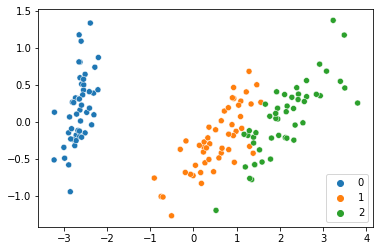

In [22]:
sns.scatterplot(x_transformed[:, 0], x_transformed[:, 1],
                hue=t, palette=sns.color_palette(n_colors=3))

In [21]:
x_transformed[:, 0]

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978,
        1.28482569,  0.93248853,  1.46430232,  0.18331772,  1.08810326,
        0.64166908,  1.09506066, -0.74912267,  1.04413183, -0.0087454 ,
       -0.50784088,  0.51169856,  0.26497651,  0.98493451, -0.17392537,
        0.92786078,  0.66028376,  0.23610499,  0.94473373,  0.04

**種成分分析を行う際の注意点**

- 必ず標準化を行うこと。

In [24]:
from sklearn.preprocessing import StandardScaler

- fit_tranceform() でfit から tranceformまで行える。

In [25]:
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
pca = PCA(n_components=2, random_state=0)

In [27]:
x_scaled_transformed = pca.fit_transform(x_scaled)

In [28]:
pd.DataFrame(x_scaled_transformed, columns=['第一主成分', '第二主成分'])

,第一主成分,第二主成分
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [29]:
pca.explained_variance_ratio_[0]

0.7296244541329987

In [30]:
pca.explained_variance_ratio_[1]

0.2285076178670178

- 全体の合計は95%ほどで、損失は少し増えている。

/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


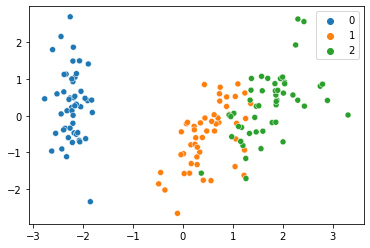

In [31]:
sns.scatterplot(x_scaled_transformed[:,0], x_scaled_transformed[:,1] ,
                hue=t, palette=sns.color_palette(n_colors=3))